In [2]:
# TODO: get this notebook hooked up with the proper variables
# it needs:
# df = dataframe of time adverbial data
# all modules loadedm including TF

# The current cells & output have been moved to here from elsewhere

# Distribution

For a set of clauses within a single book, 1–N, create clusters of clauses, where cluster = a 50 clause stretch. If a book ends without an even 50 clauses, keep the uneven cluster as either its own cluster (if N-clauses > 30) or add it to last cluster in the book.

In [73]:
# divide texts evenly into slices of 50 clauses

clause_segments = []

for book in F.otype.s('book'):
    
    clauses = list(L.d(book,'clause'))
    cluster = []
    
    for i, clause in enumerate(clauses):

        i += 1
        
        # skip non-Hebrew clauses
        lang = F.language.v(L.d(clause,'word')[0])
        if lang != 'Hebrew':
            continue

        cluster.append(clause)

        # create cluster of 50
        if (i and i % 50 == 0):
            clause_segments.append(cluster)
            cluster = []

        # deal with final uneven clusters
        elif i == len(clauses):
            if len(cluster) < 30:
                clause_segments[-1].extend(cluster) # add to last cluster
            else:
                clause_segments.append(cluster) # keep as cluster

In [76]:
len(clause_segments)

1735

In [75]:
unevens = [cl for cl in clause_segments if len(cl) != 50]
print('lengths of uneven-sized clusters:')
for cl in unevens:
    print(len(cl), end='; ')

lengths of uneven-sized clusters:
37; 76; 77; 75; 59; 69; 46; 62; 35; 46; 44; 47; 74; 34; 78; 55; 39; 35; 35; 59; 54; 55; 36; 61; 41; 77; 34; 40; 36; 63; 56; 48; 73; 33; 38; 32; 27; 45; 74; 42; 64; 67; 

We will now iterate through the clusters and tally the number of time adverbials contained within each one. We track along the way the starting points for each new book in the corpus. Those are recorded so they can be plotted. The plot is presented further below as a strip-plot.


In [78]:
# map book names for visualizing

# map grouped book names
book_map = {'1_Kings': 'Kings', '2_Kings':'Kings', '1_Samuel':'Samuel',
            '2_Samuel':'Samuel', '1_Chronicles':'Chronicles', '2_Chronicles':'Chronicles',}
# book of 12
for book in ('Hosea', 'Joel', 'Amos', 'Obadiah',
             'Jonah', 'Micah', 'Nahum', 'Habakkuk',
             'Zephaniah', 'Haggai', 'Zechariah',
             'Malachi'): 
    book_map[book] = 'Twelve'

# Megilloth
for book in ('Ruth', 'Lamentations', 'Ecclesiastes', 
             'Esther', 'Song_of_songs'): 
    book_map[book] = 'Megilloth'

# Dan-Neh
for book in ('Ezra', 'Nehemiah', 'Daniel'): 
    book_map[book] = 'Daniel-Neh'

In [81]:
# build strip plot data

stripdata = {
    'location': [],
    'duration': []
}

covered_nodes = set()
bookboundaries = {}

# iterate through clauses and gather book data
this_book = None
for i, seg in enumerate(clause_segments):
    
    for cl in seg:
        book, chapter, verse = T.sectionFromNode(cl)
        this_book = book_map.get(book, book)
        
        # skip un-covered clauses
        if cl not in df.index:
            continue
            
        # skip TAs without qualities
        qual = df.loc[cl]['quality']
        if not qual or qual not in {'location', 'duration'}:
            continue
            
        # decide which to put it in    
        stripdata[qual].append(i+1)

        # add book boundaries for plotting
        if this_book not in bookboundaries: 
            bookboundaries[this_book] = i+1

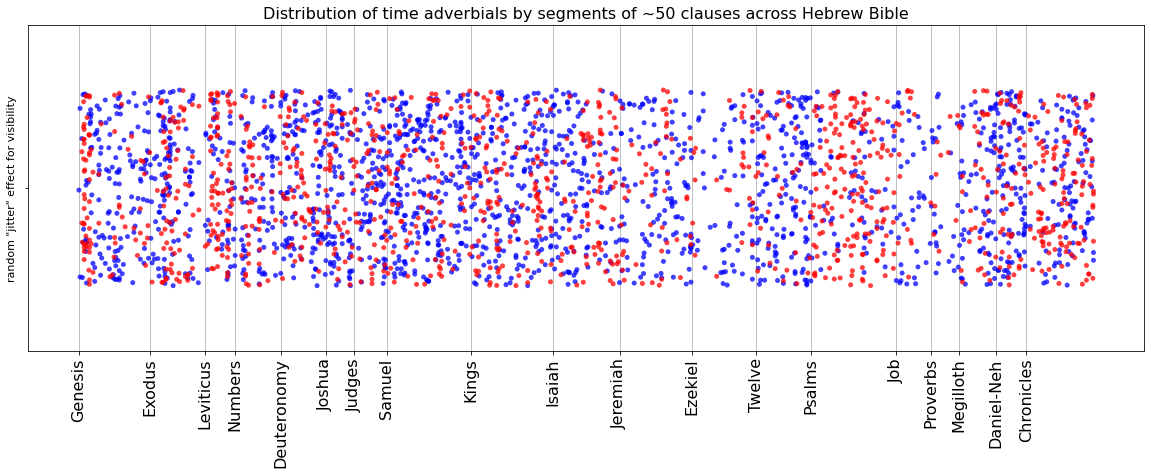

In [91]:
strip_title = 'Distribution of time adverbials by segments of ~50 clauses across Hebrew Bible'

# plot the durative and locatives
plt.figure(figsize=(20, 6))
sns.stripplot(x=stripdata['location'], color='blue', jitter=0.3, alpha=0.75)
sns.stripplot(x=stripdata['duration'], color='red', jitter=0.3, alpha=0.75)
plt.xticks(ticks=list(bookboundaries.values()), labels=list(bookboundaries.keys()), rotation='vertical', size=16)
plt.ylabel('random "jitter" effect for visibility', size=11)
plt.grid(axis='x')
plt.title(strip_title, size=16)
out.plot('dur_loc_stripplot')

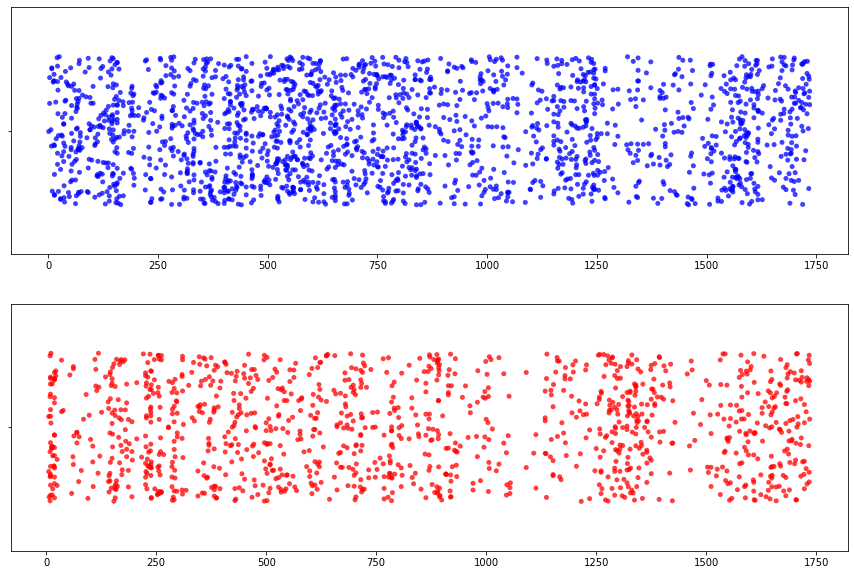

In [100]:
# plot the durative and locatives
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs = axs.ravel()
colors = ['blue', 'red']

for i, qual in enumerate(stripdata):
    ax = axs[i]
    sns.stripplot(x=stripdata[qual], color=colors[i], jitter=0.3, alpha=0.75, ax=ax)
    #plt.xticks(ticks=list(bookboundaries.values()), labels=list(bookboundaries.keys()), rotation='vertical', size=16
    #plt.ylabel('random "jitter" effect for visibility', size=11, ax=ax)
    #plt.grid(axis='x', ax=ax)
    
out.plot('dur_loc_separate_stripplot')

## Measure of Distribution

## Distribution by Genre